In [83]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

In [84]:
#Enter Twitter API credentials  

<h1>Goal: Conserve Energy in Smart homes</h1>


![Image](Images/Capstone flowchart.png)

In [85]:
import tweepy #https://github.com/tweepy/tweepy
import csv

def get_all_tweets(screen_name):
    #Twitter only allows access to a users most recent 3240 tweets with this method

    #authorize twitter, initialize tweepy
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    

    alltweets = []

    #make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    
    #save most recent tweets
    alltweets.extend(new_tweets)
    
    #save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
    
    #keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        print "getting tweets before %s" % (oldest)

        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)

        #save most recent tweets
        alltweets.extend(new_tweets)

        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1

        print "...%s tweets downloaded so far" % (len(alltweets))

    #transform the tweepy tweets into a 2D array that will populate the csv	
    outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")] for tweet in alltweets]
    
    #write the csv
    with open('%s_tweets.csv' % screen_name, 'wb') as f:
        writer = csv.writer(f)
        writer.writerow(["id","created_at","text"])
        writer.writerows(outtweets)
    
    pass


if __name__ == '__main__':
    get_all_tweets("houseofcoates")

getting tweets before 775757580790554623
...400 tweets downloaded so far
getting tweets before 764158662663430143
...600 tweets downloaded so far
getting tweets before 753626642497544191
...800 tweets downloaded so far
getting tweets before 719700401021390848
...999 tweets downloaded so far
getting tweets before 694128063949475844
...1199 tweets downloaded so far
getting tweets before 652302334614224896
...1399 tweets downloaded so far
getting tweets before 617418429587431429
...1599 tweets downloaded so far
getting tweets before 593625722968776703
...1799 tweets downloaded so far
getting tweets before 565591732482748415
...1999 tweets downloaded so far
getting tweets before 541796341949951999
...2199 tweets downloaded so far
getting tweets before 525124588737658879
...2399 tweets downloaded so far
getting tweets before 508844879590727679
...2599 tweets downloaded so far
getting tweets before 480794631844950015
...2799 tweets downloaded so far
getting tweets before 450072767195787263
.

In [90]:
test = pd.read_csv('houseofcoates_tweets.csv')
print test.head()

                   id           created_at  \
0  781857470264279041  2016-09-30 14:05:21   
1  781730920114032640  2016-09-30 05:42:29   
2  781676364877430784  2016-09-30 02:05:42   
3  781676356476239874  2016-09-30 02:05:40   
4  781632024541003776  2016-09-29 23:09:31   

                                                text  
0   Someone just turned off the nice lamp by the TV.  
1  I just noticed some movement in the Sitting Ro...  
2  Phew, the big glaring lights downstairs have b...  
3  Someone just turned on the main lights in the ...  
4   Someone just turned off the nice lamp by the TV.  


After obtaining the CSV file, we proceed to extract the data

![Image](Images/fig1.jpg)

![Image](Images/fig2.jpg)

In [86]:
import pandas as pd
import numpy as np
import datetime
import matplotlib

In [87]:
test = pd.read_csv('houseofcoates_tweets.csv')

In [88]:
date_time_list = []
for i,ele in enumerate(test.iloc[:,2]):
    if 'Someone' in ele:
        if 'off' not in ele: 
            date_time_list.append(test.iloc[i]['created_at'])
    elif 'someone' in ele:
        if 'off' not in ele: 
            date_time_list.append(test.iloc[i]['created_at'])
    elif 'welcome' in ele:
        date_time_list.append(test.iloc[i]['created_at'])
    elif 'now on' in ele:
        date_time_list.append(test.iloc[i]['created_at'])
time = pd.to_datetime(date_time_list)

dates = []
hours = []
for ele in time:
    dates.append(ele.date())
    hours.append(ele.time())
print dates[0],hours[0]

2016-09-30 05:42:29


<h1>When somebody switched something on</h1>

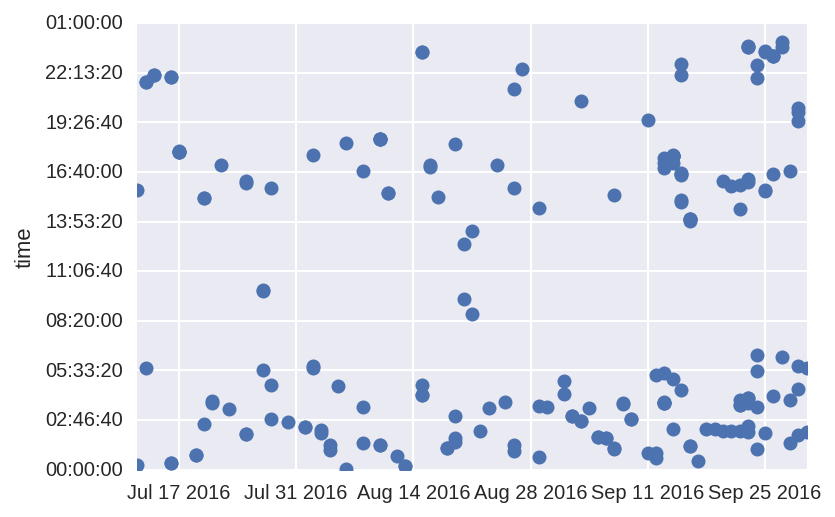

In [89]:
dates2 = matplotlib.dates.date2num(dates)
matplotlib.pyplot.plot_date(dates[:200], hours[:200])

<h1>When something was switched off</h1>

2016-09-30 14:05:21


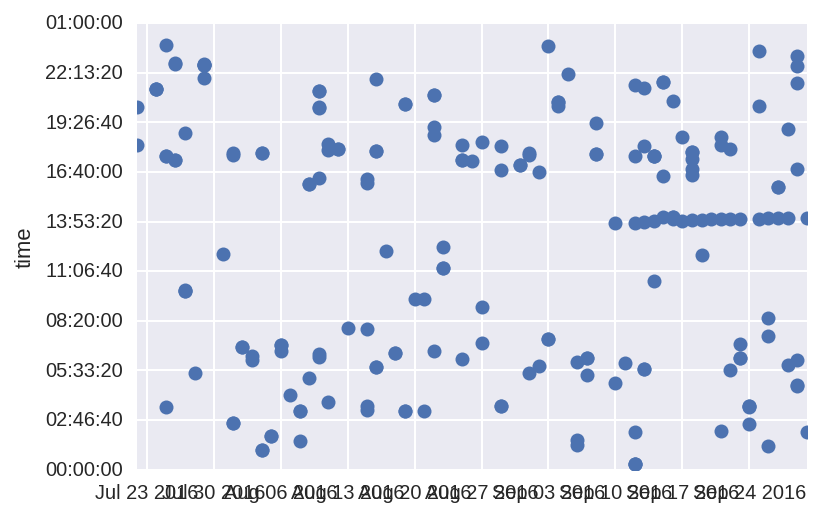

In [91]:
date_time_list = []
for i,ele in enumerate(test.iloc[:,2]):
    if 'off' in ele:
        if 'roomba' not in ele:
            date_time_list.append(test.iloc[i]['created_at'])
time = pd.to_datetime(date_time_list)

dates = []
hours = []
for ele in time:
    dates.append(ele.date())
    hours.append(ele.time())
print dates[0],hours[0]

dates2 = matplotlib.dates.date2num(dates)
matplotlib.pyplot.plot_date(dates[:200], hours[:200])

In [140]:
import pandas as pd
test = pd.read_csv('dataset.csv')
print test.head()

test.columns = ['tweet']

  I see Adarsh sitting and working at his desk right now  2016/10/13 11:39:31
0  Photo auto-tweet from Pi: 2016/10/13 11:08:47 ...                         
1  I spotted Adarsh Sitting at his desk! I could ...                         
2  I spotted Adarsh Sitting at his desk! Probably...                         
3        Adarsh is at his desk!  2016/10/13 10:09:07                         
4  Photo auto-tweet from Pi: 2016/10/13 10:08:44 ...                         


In [141]:

import re
li = []
z = ['not' , 'Where' , 'haven\'t']
for ele in test['tweet']:
    if 'Photo' not in ele.split():
        li.append(ele)
        
df = pd.DataFrame(li,columns=['tweets'])

features = []

for ele in df['tweets']:
    if 'not' in ele:
        z = re.findall(r'\d+',ele)
        z.append(0)
        features.append(tuple(z))
    elif 'haven\'t' in ele:
        z = re.findall(r'\d+',ele)
        z.append(0)
        features.append(tuple(z))
    elif 'miss' in ele:
        z = re.findall(r'\d+',ele)
        z.append(0)
        features.append(tuple(z))
    else:
        z = re.findall(r'\d+',ele)
        z.append(1)
        features.append(tuple(z))  
        
pd2 = pd.DataFrame(features)
pd2.columns = ['year','month','date','hour','minute','second','detect']


In [142]:

#print pd2[['hour','detect']]

from sklearn import svm
x = pd2['hour'].values.tolist()
y = pd2['detect'].values.tolist()

X = []
for ele in x:
    X.append([ele])
   
    
clf = svm.SVC(kernel='rbf', gamma=0.7, C=1, probability=True)
clf.fit(X, y) 

xx = []
yy = []
for i in range(24):
    #print i,clf.predict([i])
    xx.append(i)
    yy.append(clf.predict_proba([i])[0])
    
print xx,yy 



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23] [array([ 0.88573129,  0.11426871]), array([ 0.88560909,  0.11439091]), array([ 0.08269177,  0.91730823]), array([ 0.09346078,  0.90653922]), array([ 0.52981297,  0.47018703]), array([ 0.88578673,  0.11421327]), array([ 0.88572932,  0.11427068]), array([ 0.89047699,  0.10952301]), array([ 0.86956507,  0.13043493]), array([ 0.08272003,  0.91727997]), array([ 0.0504099,  0.9495901]), array([ 0.08270536,  0.91729464]), array([ 0.08269177,  0.91730823]), array([ 0.08270307,  0.91729693]), array([ 0.08266261,  0.91733739]), array([ 0.08274709,  0.91725291]), array([ 0.08262714,  0.91737286]), array([ 0.08274702,  0.91725298]), array([ 0.08265616,  0.91734384]), array([ 0.08270536,  0.91729464]), array([ 0.08267759,  0.91732241]), array([ 0.08274237,  0.91725763]), array([ 0.88250083,  0.11749917]), array([ 0.88570106,  0.11429894])]


/opt/conda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/opt/conda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/opt/conda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/opt/conda

In [143]:

pll = []
for ele in yy:
    pll.append(ele[1])

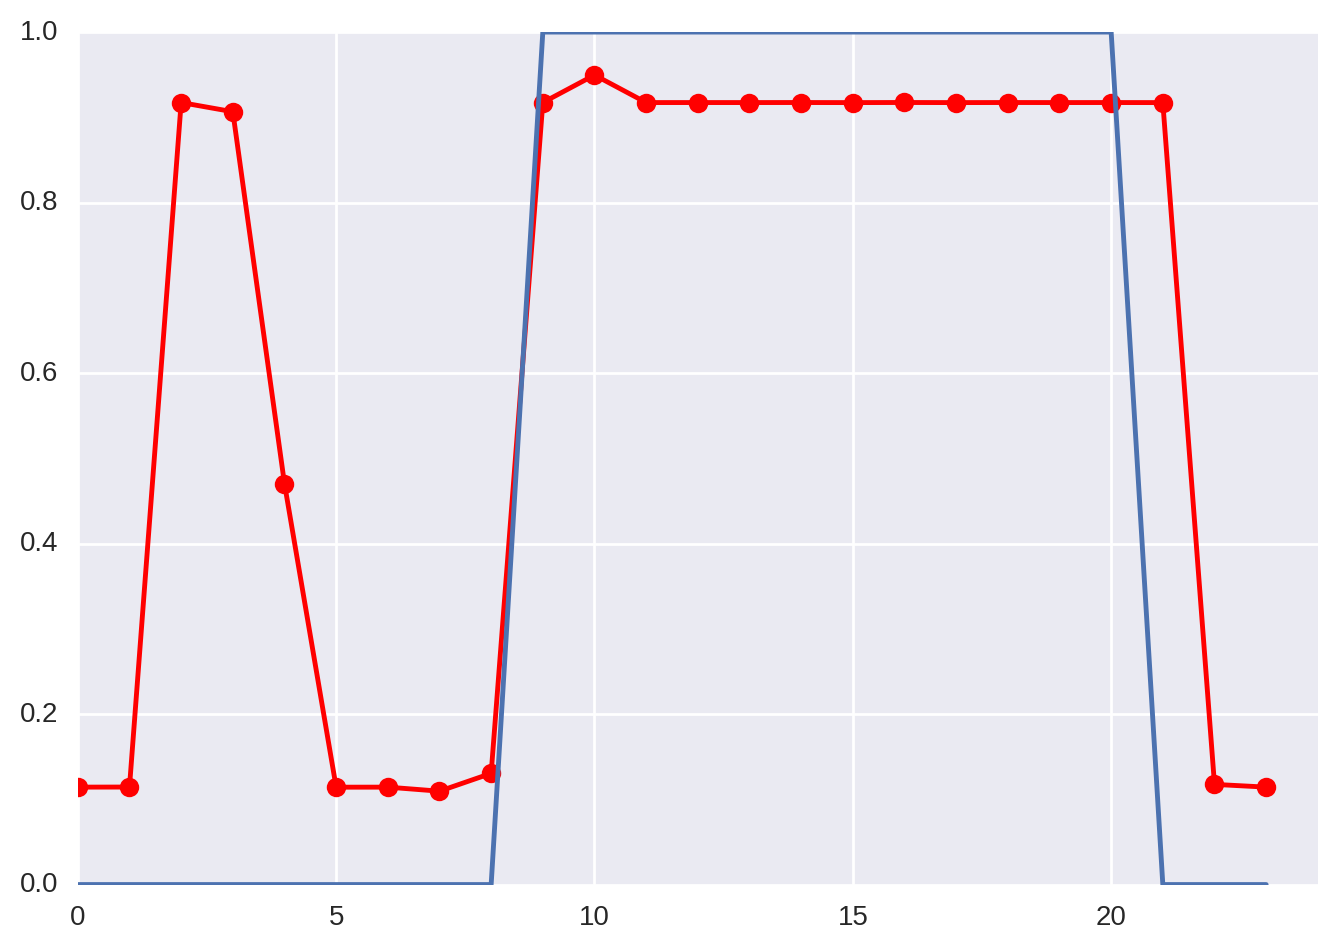

In [144]:
plt.plot(xx, pll, 'ro')
plt.plot(xx, pll,color='red')
plt.plot(xx,[0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0])
plt.axis([0, 24, 0, 1])
plt.show()